In [1]:
%pip install pandas matplotlib numpy pathlib pingouin lets_plot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\wujinzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
#import pingouin as pg
from lets_plot import *

LetsPlot.setup_html(no_js=True)

### You don't need to use these settings yourself,
### they are just here to make the charts look nicer!
# Set the plot style for prettier charts:
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

Questions:Explain in your own words what temperature ‘anomalies’ are. Why have researchers chosen this particular measure over other measures (such as absolute temperature)?

The answer:
(1)A temperature "anomaly" is typically defined as a temperature that falls outside the normal range or expected value, suggesting the potential for an underlying issue or change. In contrast, absolute temperature represents the average kinetic energy of molecular motion and is expressed in Kelvins (K).
(2)Researchers select temperature "anomalies" over absolute temperatures due to their greater practicality, intuitiveness, ease of comprehension, suitability for comparison with normal conditions, and adaptability to diverse research fields and objectives.

In [3]:
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [4]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.54,-0.24,-0.31,-0.05,-0.18,-0.23,-0.27,-0.26,-0.31,-0.46,-0.43,-0.31,NaN,NaN,-0.20,-0.23,-0.34
1,1881,-0.31,-0.26,-0.07,-0.03,0.03,-0.34,0.08,-0.06,-0.29,-0.45,-0.38,-0.24,-0.19,-0.21,-0.33,-0.02,-0.11,-0.37
2,1882,0.25,0.20,0.01,-0.31,-0.24,-0.29,-0.28,-0.17,-0.26,-0.53,-0.34,-0.69,-0.22,-0.18,0.07,-0.18,-0.25,-0.38
3,1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.11,-0.06,-0.23,-0.34,-0.16,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.13,-0.32
4,1884,-0.17,-0.11,-0.64,-0.59,-0.36,-0.41,-0.41,-0.51,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.7 KB


In [6]:
df = pd.read_csv("https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 146 entries, ('Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA') to ('2024', '1.68', '1.93', '1.78', '1.80', '1.45', '1.54', '1.42', '1.42', '1.58', '1.72', '***', '***', '***', '***', '1.82', '1.67', '1.46')
Data columns (total 1 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Land-Ocean: Northern Hemispheric Means  146 non-null    object
dtypes: object(1)
memory usage: 67.1+ KB


In [8]:
print(df.head())

                                                                                          Land-Ocean: Northern Hemispheric Means
Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  J-D  D-N  DJF  MAM  JJA                                     SON
1880 -.39 -.54 -.24 -.31 -.05 -.18 -.23 -.27 -.26 -.31 -.46 -.43 -.31 ***  ***  -.20 -.23                                   -.34
1881 -.31 -.26 -.07 -.03 .03  -.34 .08  -.06 -.29 -.45 -.38 -.24 -.19 -.21 -.33 -.02 -.11                                   -.37
1882 .25  .20  .01  -.31 -.24 -.29 -.28 -.17 -.26 -.53 -.34 -.69 -.22 -.18 .07  -.18 -.25                                   -.38
1883 -.58 -.66 -.15 -.30 -.26 -.11 -.06 -.23 -.34 -.16 -.45 -.15 -.29 -.33 -.64 -.24 -.13                                   -.32


Questions:Try importing the data again without using the keyword argument option na_values="***" at all and see what difference it makes.

The answer: By comparing the output of.info(), you can see the difference in importing the data without parameters. Some columns may be recognized as object instead of float64 or int64, which usually means they contain non-numeric characters.

In [9]:
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [10]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.54,-0.24,-0.31,-0.05,-0.18,-0.23,-0.27,-0.26,-0.31,-0.46,-0.43,-0.31,NaN,NaN,-0.20,-0.23,-0.34
1,1881,-0.31,-0.26,-0.07,-0.03,0.03,-0.34,0.08,-0.06,-0.29,-0.45,-0.38,-0.24,-0.19,-0.21,-0.33,-0.02,-0.11,-0.37
2,1882,0.25,0.20,0.01,-0.31,-0.24,-0.29,-0.28,-0.17,-0.26,-0.53,-0.34,-0.69,-0.22,-0.18,0.07,-0.18,-0.25,-0.38
3,1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.11,-0.06,-0.23,-0.34,-0.16,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.13,-0.32
4,1884,-0.17,-0.11,-0.64,-0.59,-0.36,-0.41,-0.41,-0.51,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.49


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.7 KB


In [12]:
df = df.set_index("Year")
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-0.39,-0.54,-0.24,-0.31,-0.05,-0.18,-0.23,-0.27,-0.26,-0.31,-0.46,-0.43,-0.31,NaN,NaN,-0.20,-0.23,-0.34
1881,-0.31,-0.26,-0.07,-0.03,0.03,-0.34,0.08,-0.06,-0.29,-0.45,-0.38,-0.24,-0.19,-0.21,-0.33,-0.02,-0.11,-0.37
1882,0.25,0.20,0.01,-0.31,-0.24,-0.29,-0.28,-0.17,-0.26,-0.53,-0.34,-0.69,-0.22,-0.18,0.07,-0.18,-0.25,-0.38
1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.11,-0.06,-0.23,-0.34,-0.16,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.13,-0.32
1884,-0.17,-0.11,-0.64,-0.59,-0.36,-0.41,-0.41,-0.51,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.49


In [13]:
df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
2020,1.59,1.70,1.67,1.40,1.27,1.14,1.10,1.12,1.19,1.21,1.59,1.19,1.35,1.36,1.56,1.44,1.12,1.33
2021,1.25,0.96,1.21,1.13,1.05,1.21,1.07,1.03,1.05,1.30,1.29,1.17,1.14,1.14,1.13,1.13,1.10,1.21
2022,1.25,1.17,1.41,1.09,1.02,1.13,1.06,1.17,1.15,1.31,1.10,1.06,1.16,1.17,1.19,1.17,1.12,1.19
2023,1.30,1.30,1.64,1.02,1.13,1.19,1.45,1.57,1.67,1.88,1.98,1.85,1.50,1.43,1.22,1.26,1.40,1.84
2024,1.68,1.93,1.78,1.80,1.45,1.54,1.42,1.42,1.58,1.72,NaN,NaN,NaN,NaN,1.82,1.67,1.46,NaN


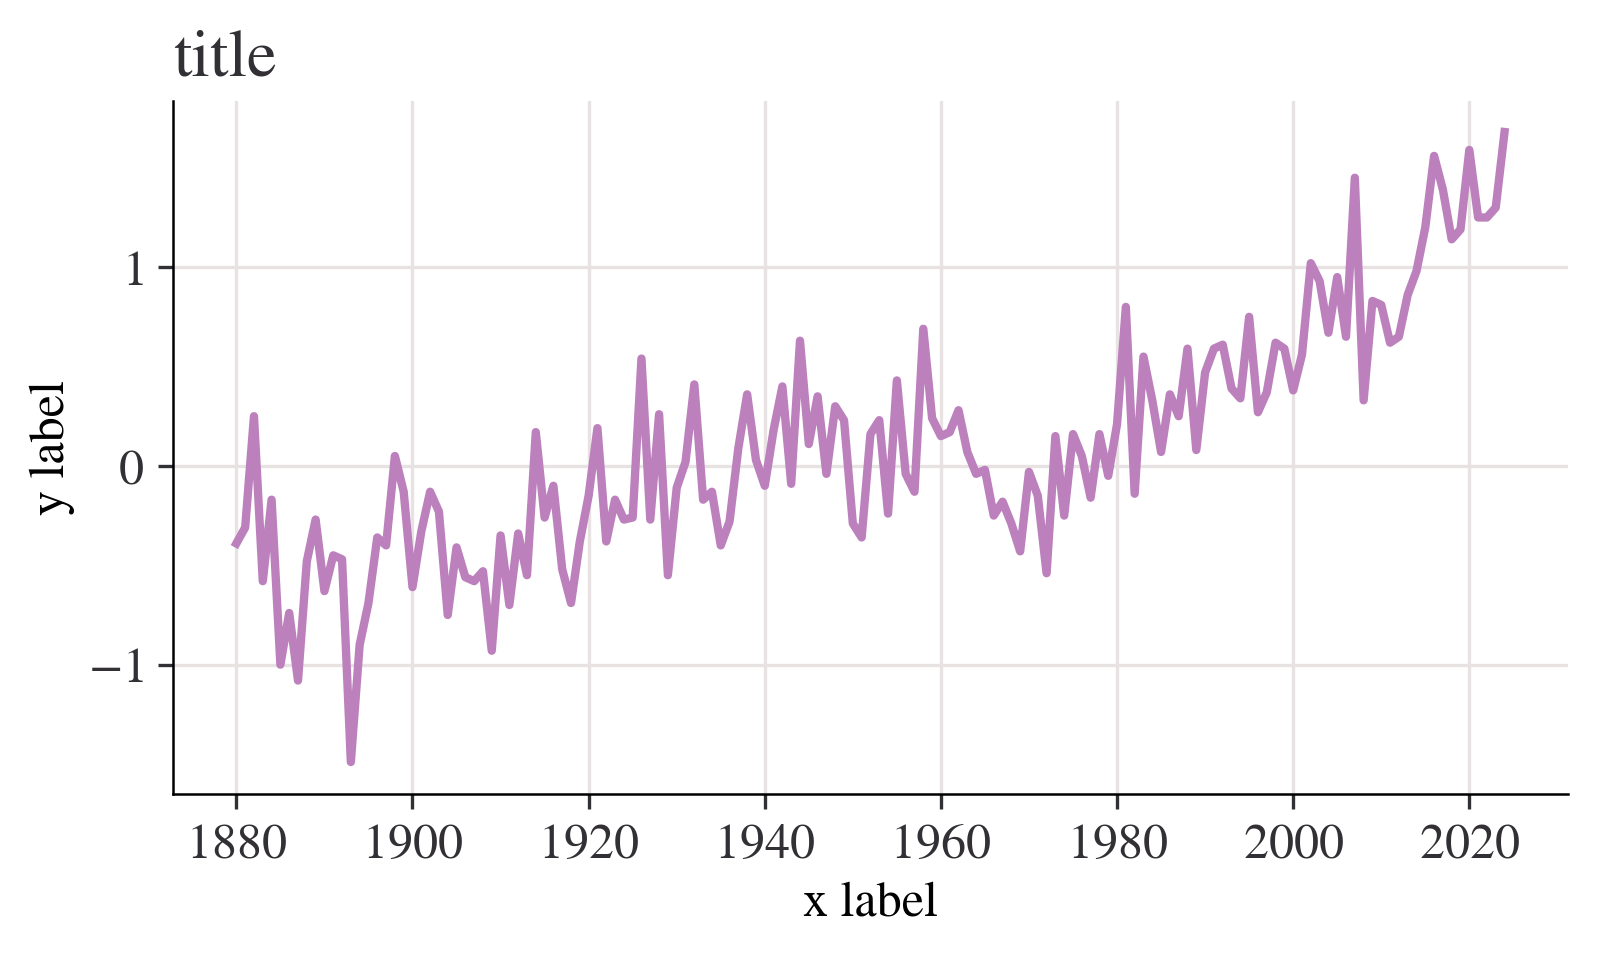

In [14]:
fig, ax = plt.subplots()
df["Jan"].plot(ax=ax)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

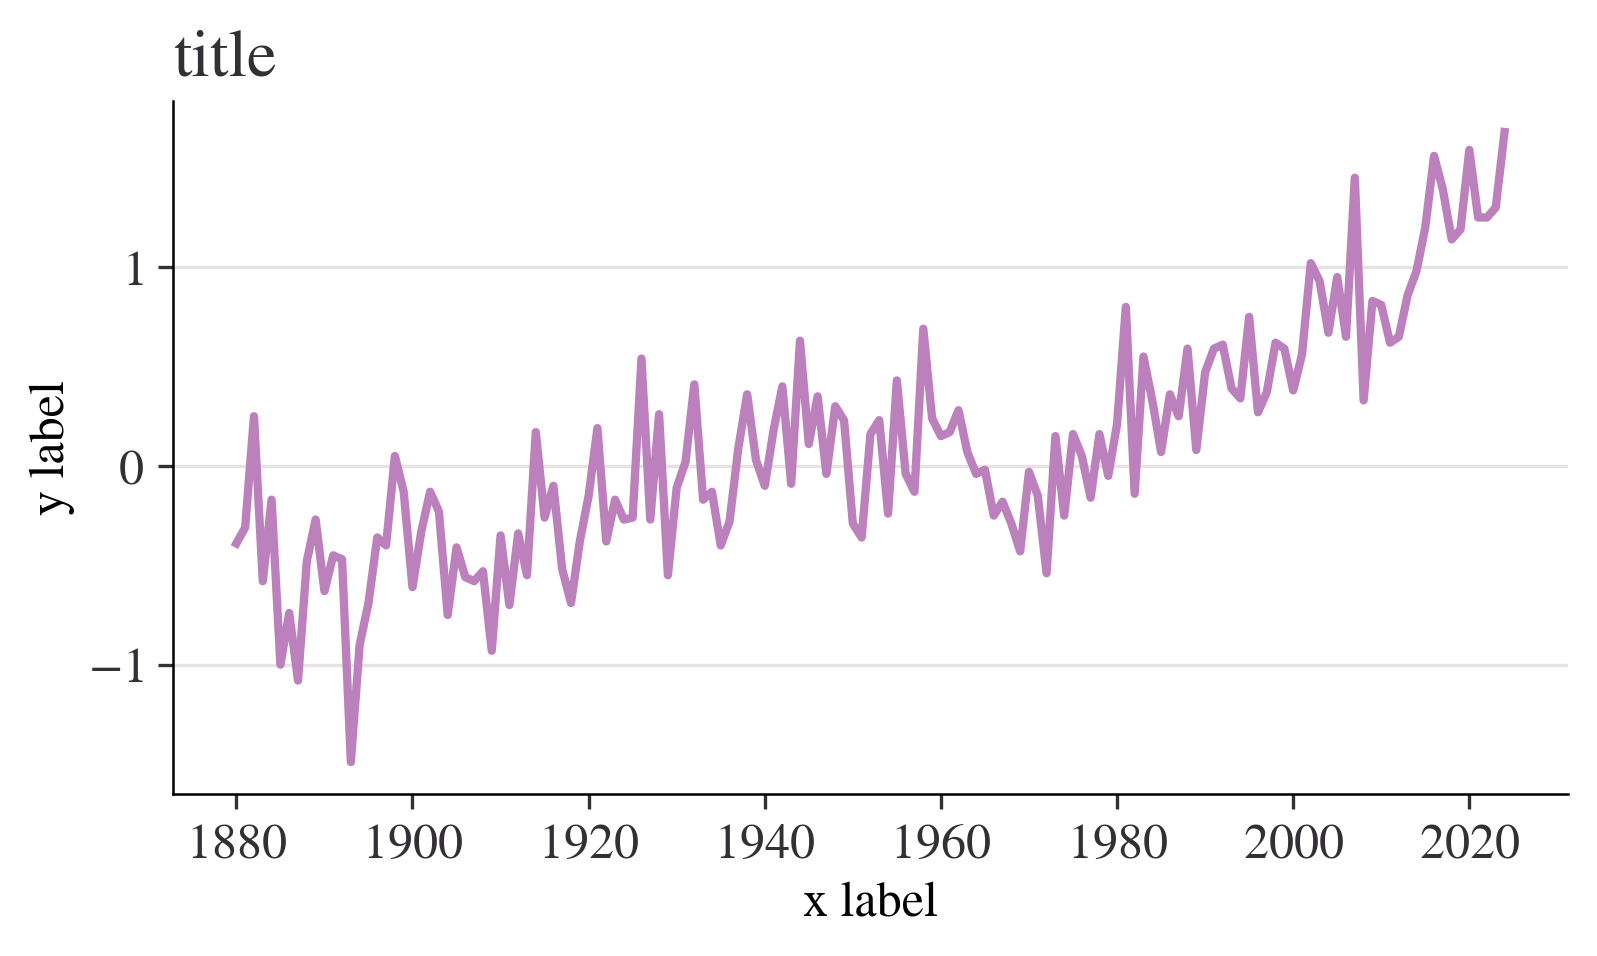

In [15]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

In [16]:
plt.show()

In [17]:
plt.savefig("name-of-chart.pdf")

<Figure size 1800x900 with 0 Axes>

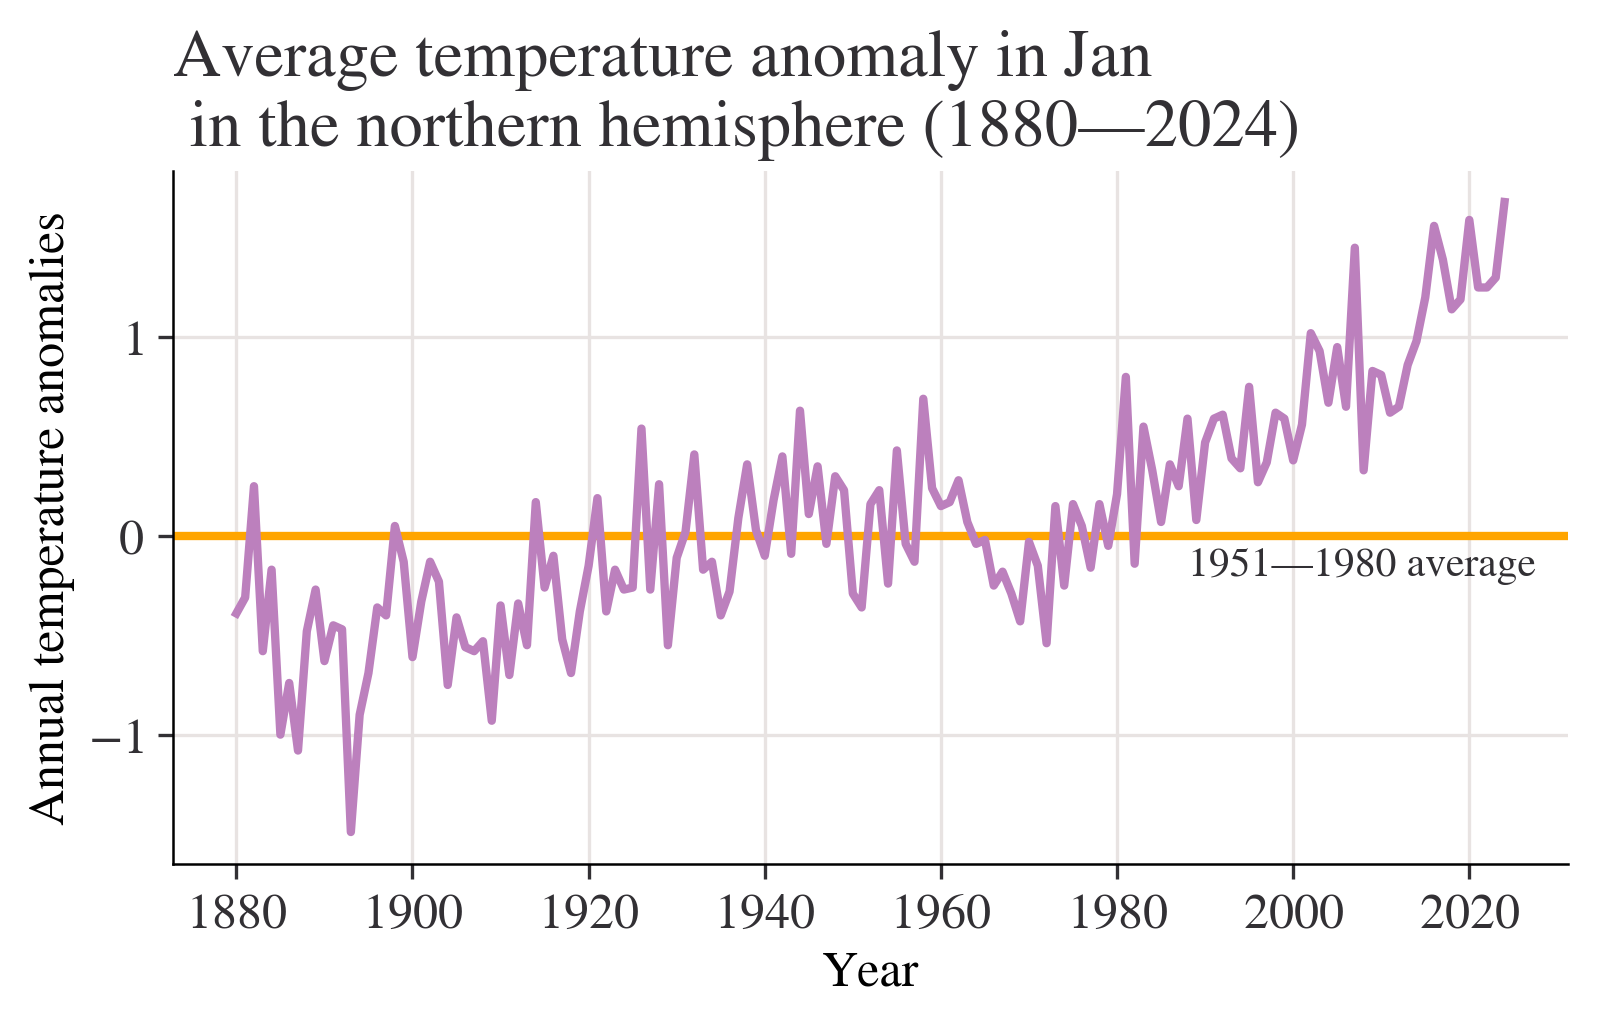

In [18]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

Extra practice:Extra practice: The columns labelled DJF, MAM, JJA, and SON contain seasonal averages (means). For example, the MAM column contains the average of the March, April, and May columns for each year. Plot a separate line chart for each season, using average temperature anomaly for that season on the vertical axis and time (from 1880 to the latest year available) on the horizontal axis.

The answer:

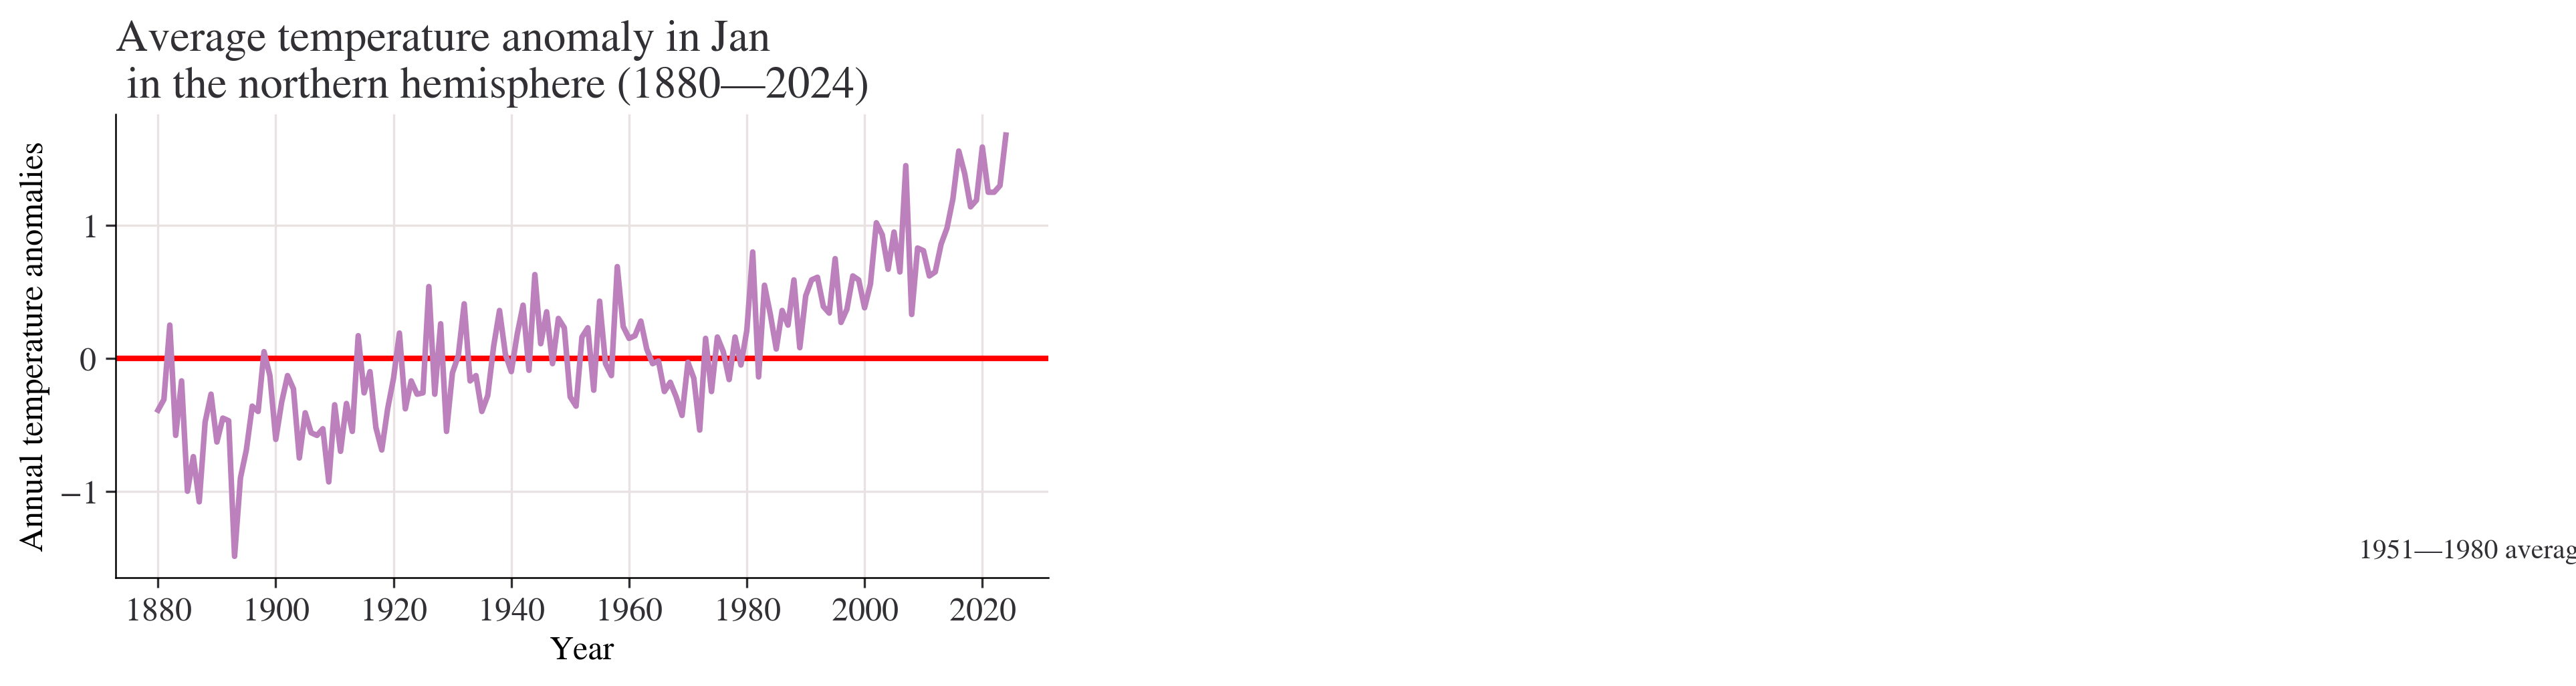

In [19]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="red")
ax.annotate("1951—1980 average",  xy=(1.96, -1.5),xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

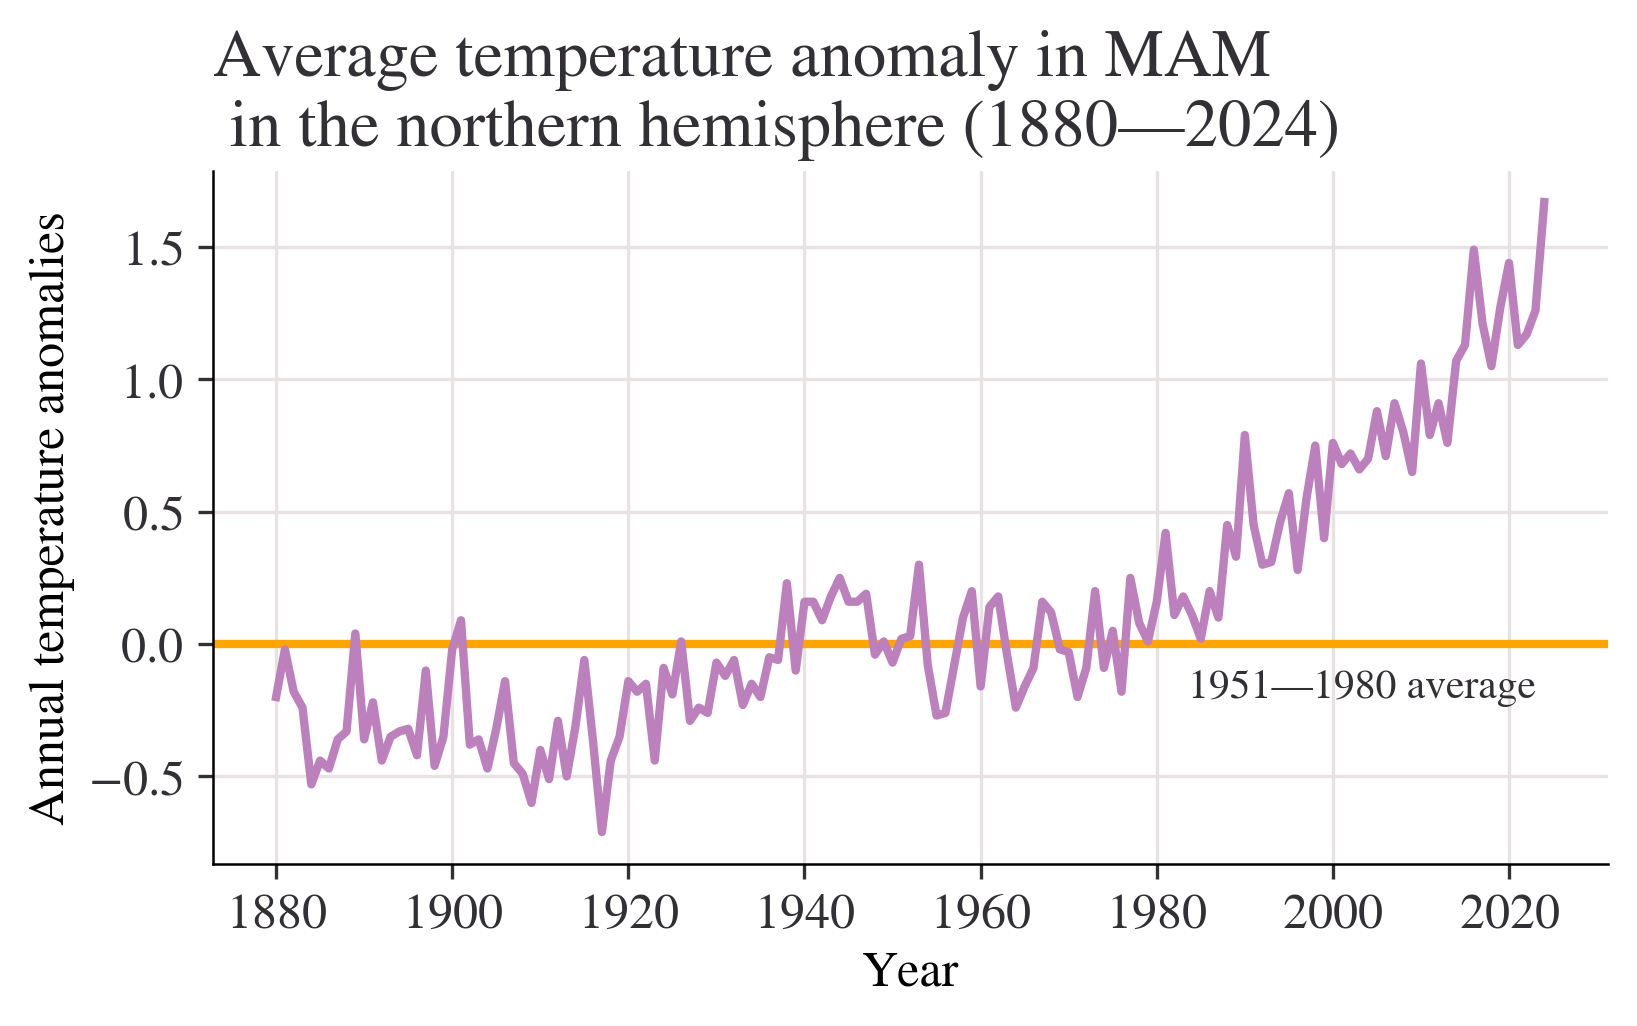

In [20]:
month = "MAM"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

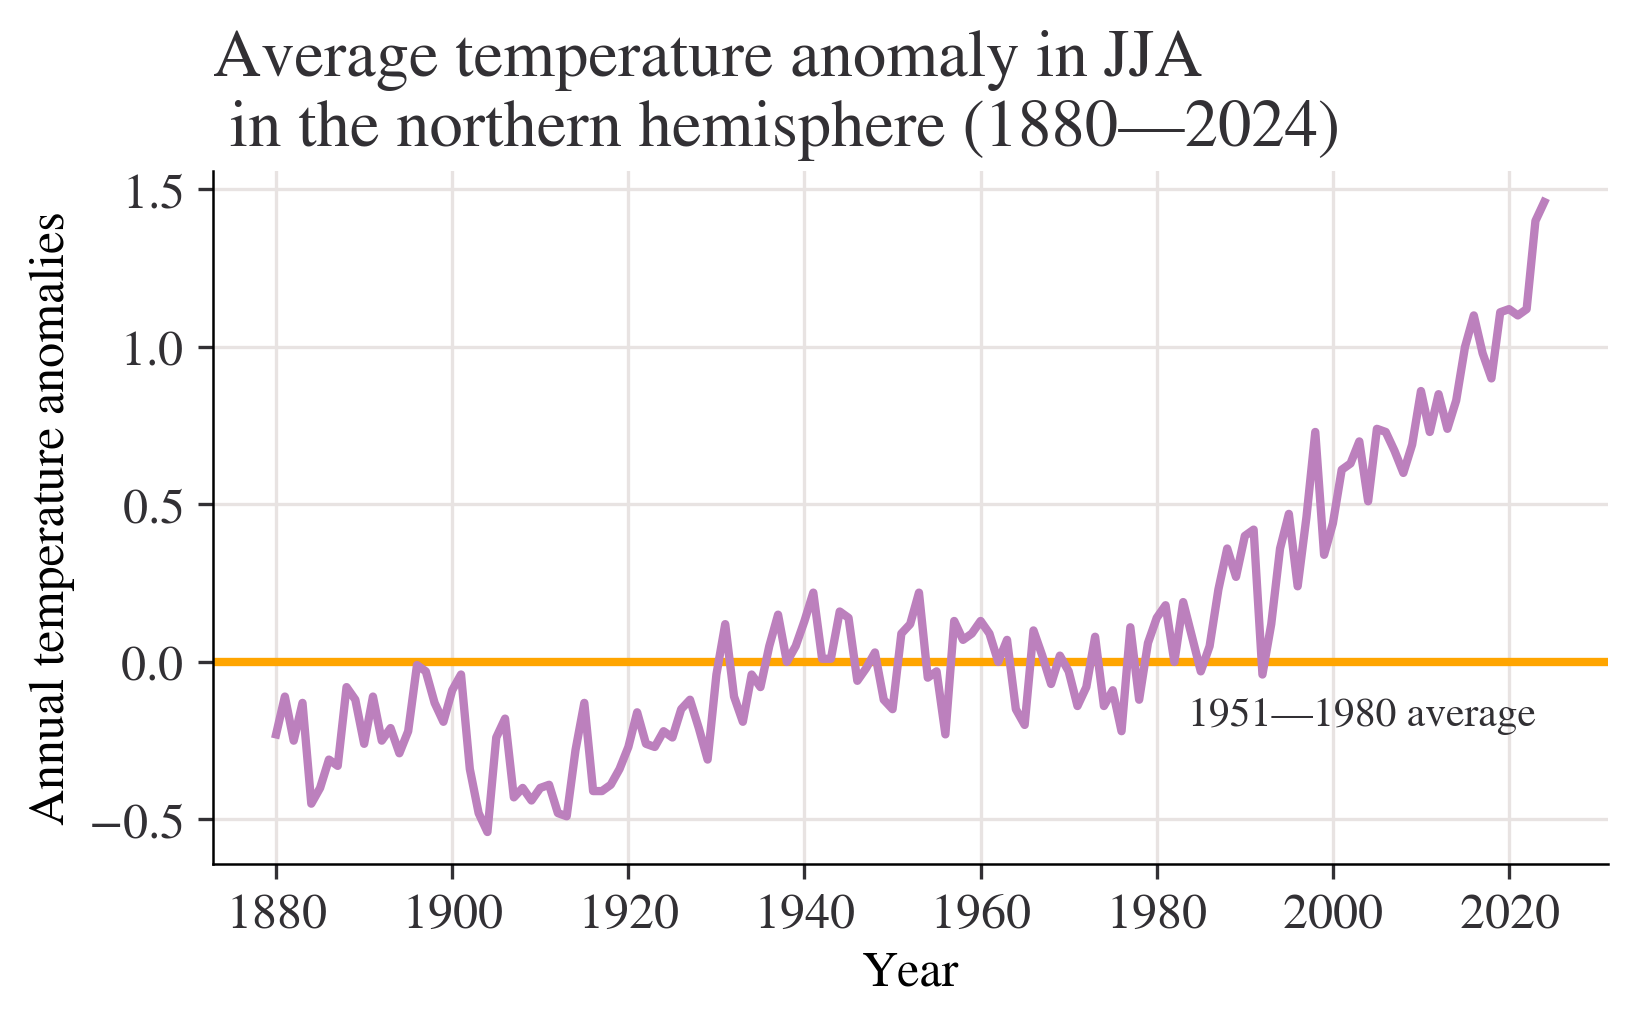

In [21]:
month = "JJA"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

Questions:What do your charts from Questions 2 to 4(a) suggest about the relationship between temperature and time?

The answer: Temperature increases with time.

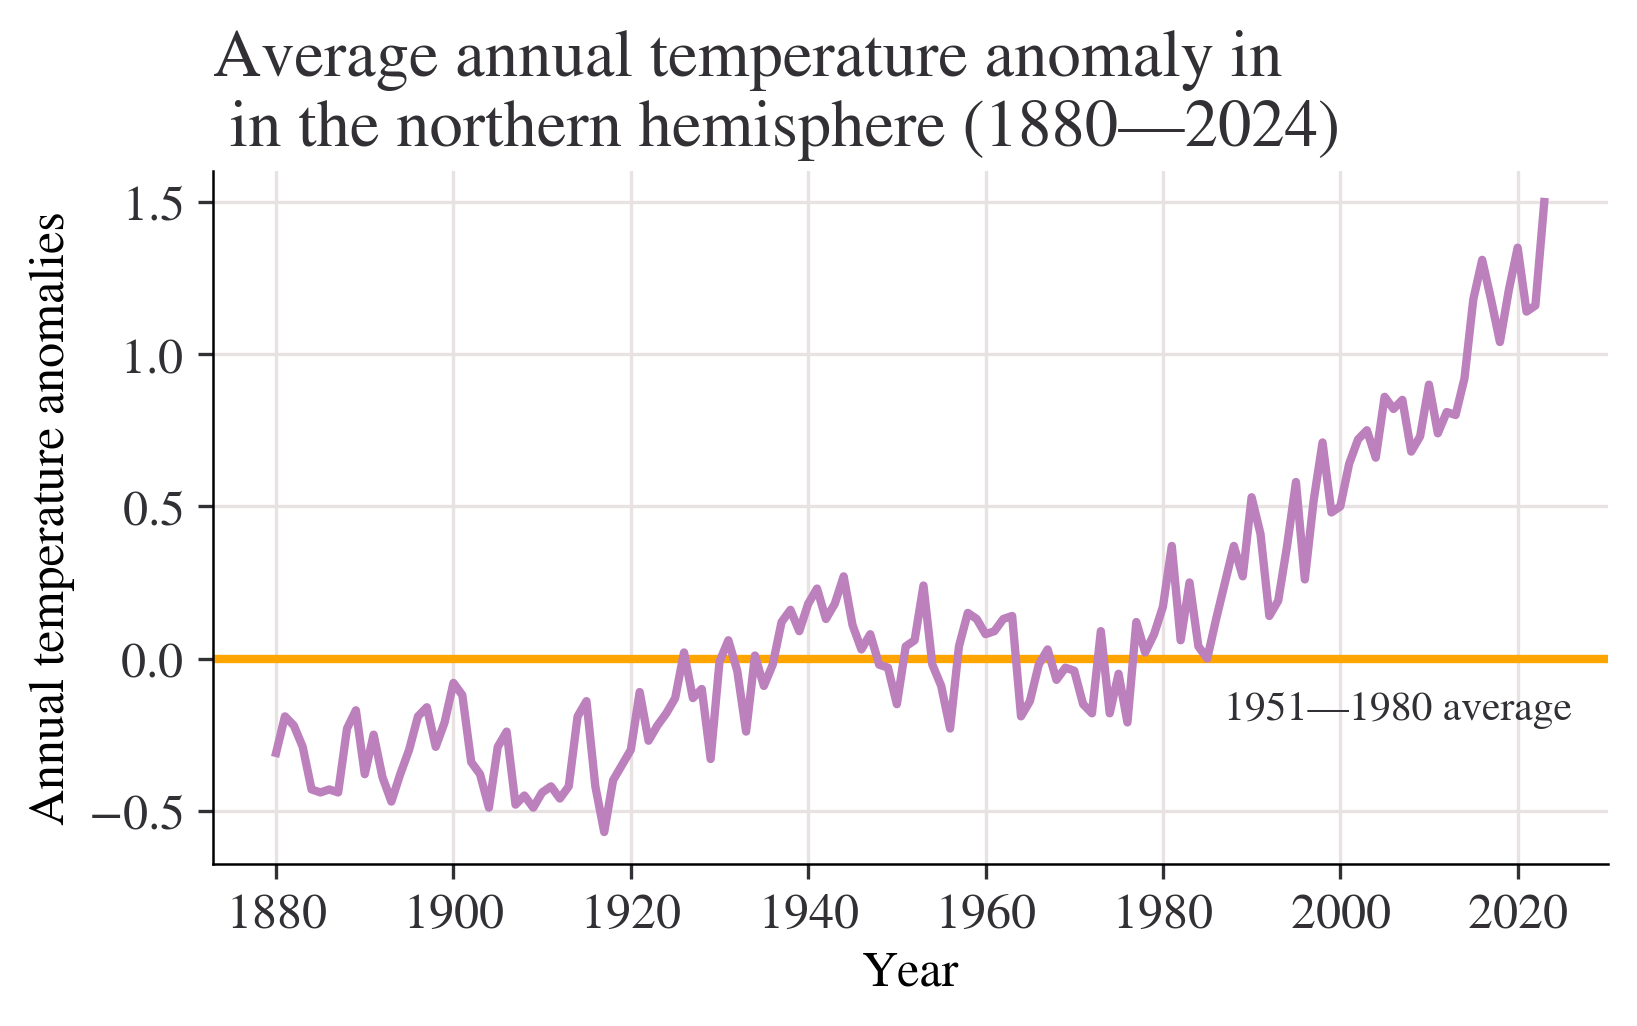

In [22]:
month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

Questions:Discuss the similarities and differences between the charts. (For example, are the horizontal and vertical axes variables the same, or do the lines have the same shape?)

The answer:
(1)Similaritie:The temperature changes with time, and the overall trend is upward.
(2)Differences:The horizontal and vertical axis variables of the two tables are different. For example, in 2000, Figure 1.4 shows a temperature of 0.5 and Figure 1.5 shows a temperature of 0.6.

Questions:Looking at the behaviour of temperature over time from 1000 to 1900 in Figure 1.4, are the observed patterns in your chart unusual?

The answer:From 1000 to 1900, the temperature fluctuate up and down with time, but the maximum value did not exceed 0.0, which indicates that the temperature change during this period was relatively small compared to the significant increase in industrial temperature after 1900, which I think is normal.


Questions:Based on your answers to Questions 4 and 5, do you think the government should be concerned about climate change?

The answer:My point of view is that according to the chart data, the temperature is rising, which is a sign of global warming, so the government should pay attention to climate change.

In [23]:
df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)

In [24]:
df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [25]:
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()

Year     
1880  Jun   -0.18
      Jul   -0.23
      Aug   -0.27
1881  Jun   -0.34
      Jul    0.08
dtype: float64

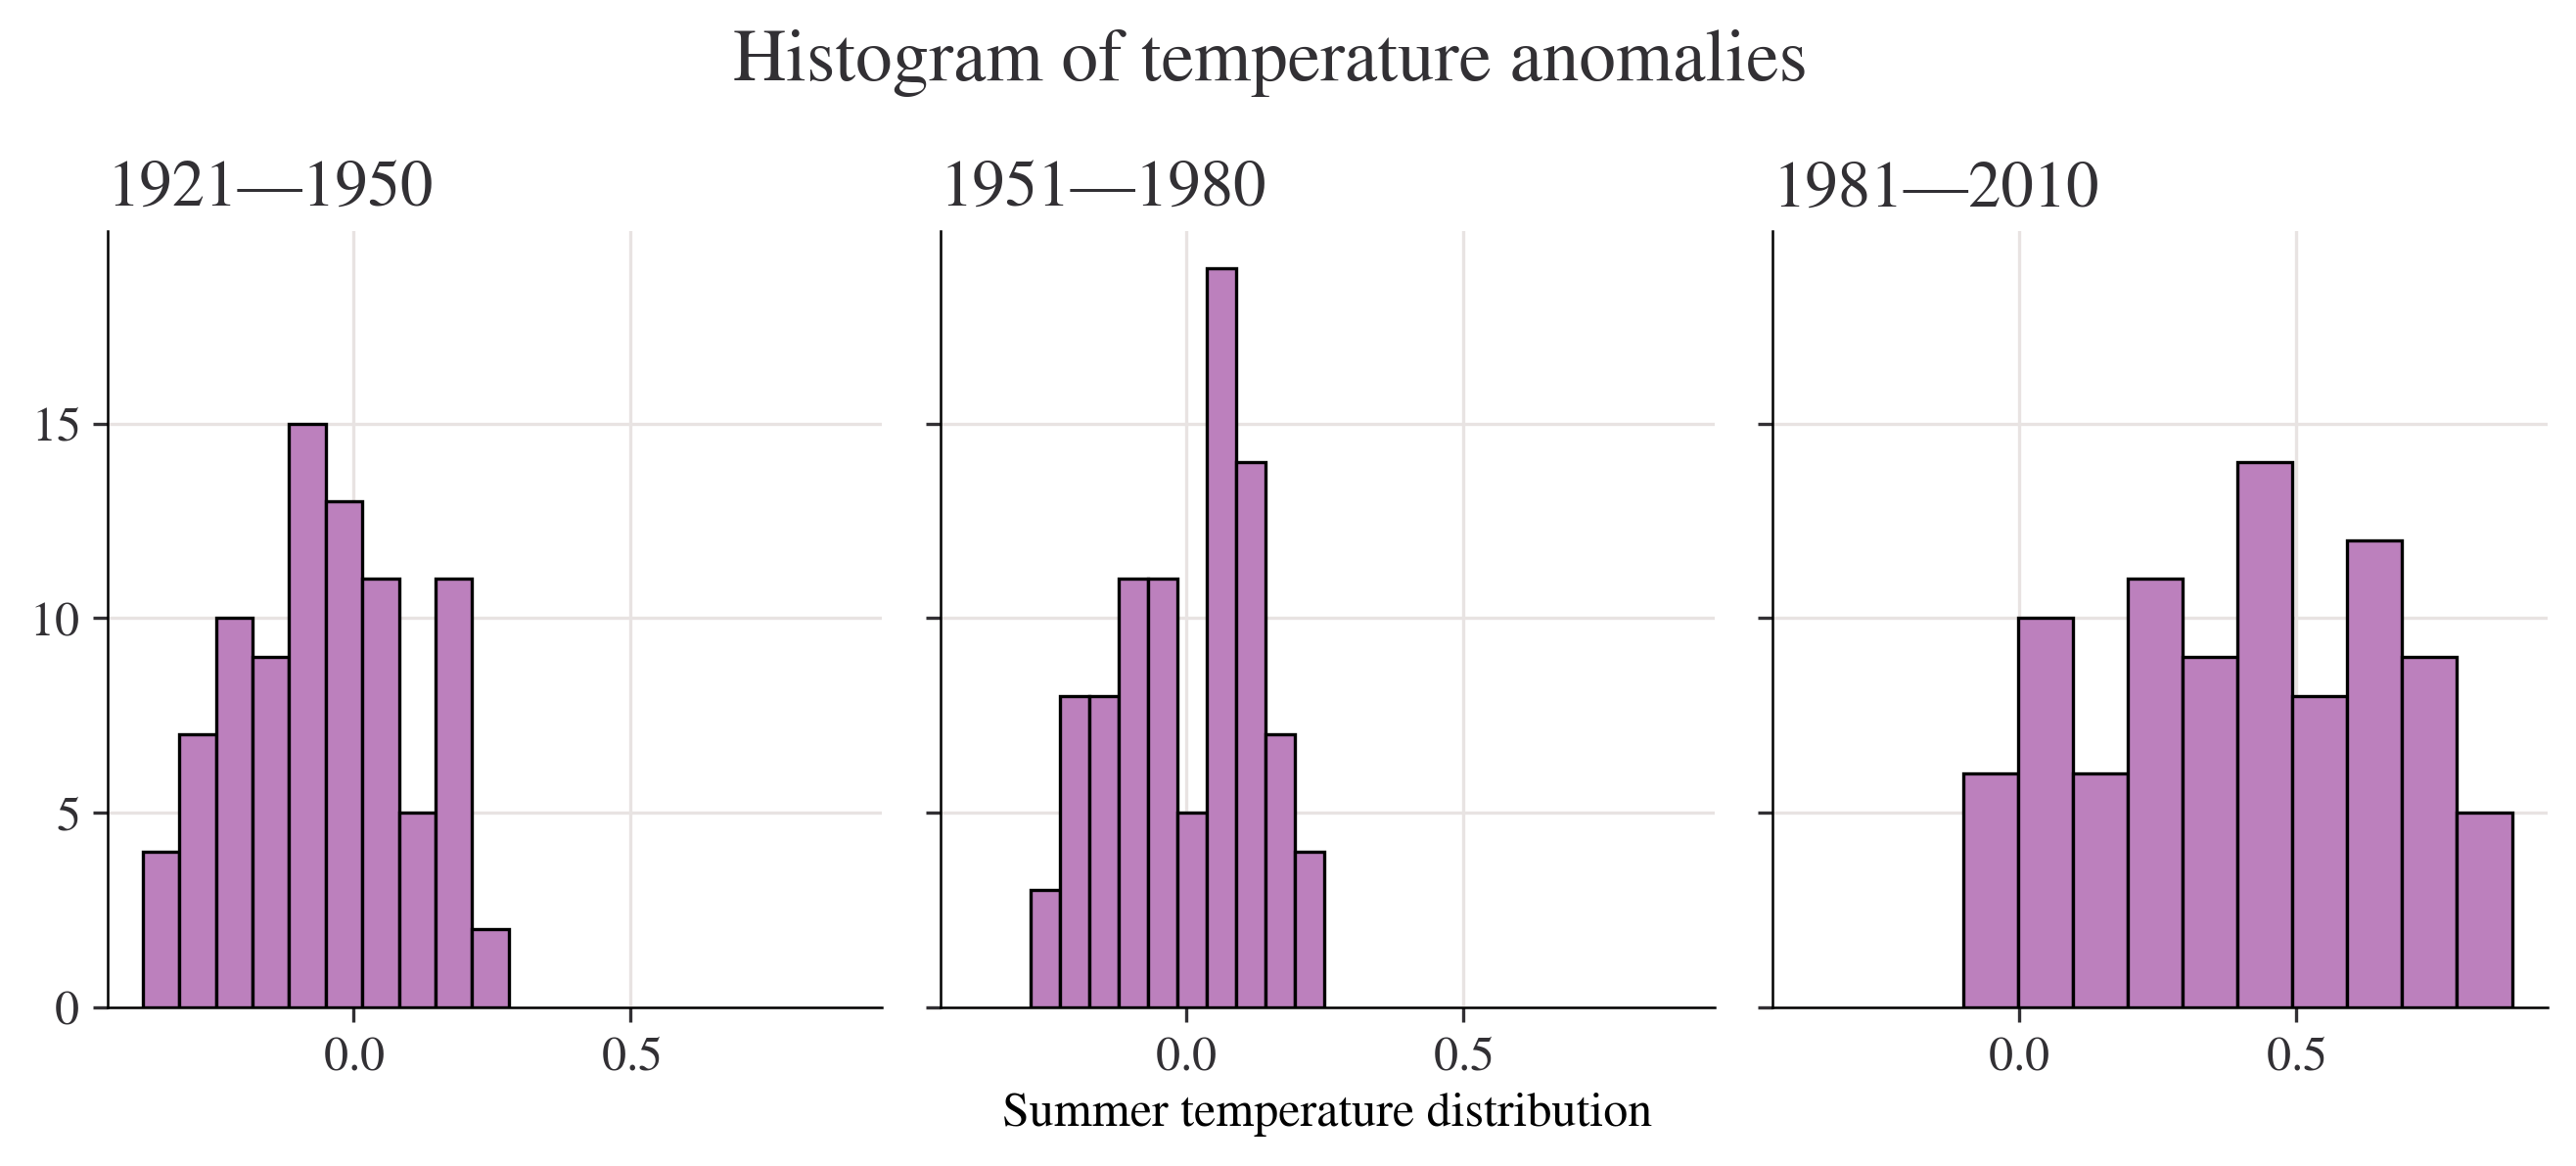

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout();

In [27]:
# Create a variable that has years 1951 to 1980, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

,Year,month,values
0,1951,Jan,-0.36
1,1951,Feb,-0.51
2,1951,Mar,-0.18
3,1951,Apr,0.06
4,1951,May,0.17
...,...,...,...
355,1980,Aug,0.10
356,1980,Sep,0.10
357,1980,Oct,0.12
358,1980,Nov,0.21


In [28]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)

print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1


In [29]:
# Create a variable that has years 1981 to 2010, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

,Year,month,values
0,1981,Jan,0.80
1,1981,Feb,0.62
2,1981,Mar,0.68
3,1981,Apr,0.39
4,1981,May,0.18


In [30]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%


In [31]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%


In [32]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

,Year,Season,Values,Period
443,1991,DJF,0.51,1981—2010
444,1991,MAM,0.45,1981—2010
445,1991,JJA,0.42,1981—2010
446,1991,SON,0.32,1981—2010
447,1992,DJF,0.44,1981—2010
448,1992,MAM,0.30,1981—2010
449,1992,JJA,-0.04,1981—2010
450,1992,SON,-0.15,1981—2010
451,1993,DJF,0.37,1981—2010
452,1993,MAM,0.31,1981—2010


Questions:Calculate the mean (average) and variance separately for the following time periods: 1921–1950, 1951–1980, and 1981–2010.

The answer:The variance of the later period is significantly higher than that of the earlier period, which indicates that the air temperature becomes more variable.

In [33]:
seasons = {
    "DJF": ["Dec", "Jan", "Feb"],
    "MAM": ["Mar", "Apr", "May"],
    "JJA": ["Jun", "Jul", "Aug"],
    "SON": ["Sep", "Oct", "Nov"]
}

In [34]:
for season, months in seasons.items():
    if all(month in df.columns for month in months):
        df[season] = df[months].mean(axis=1)

In [35]:
periods = {
    "1921-1950": (1921, 1950),
    "1951-1980": (1951, 1980),
    "1981-2010": (1981, 2010)
}

In [36]:
results = {}
for season in seasons.keys():
    if season in df.columns:
        results[season] = {}
        for period, (start_year, end_year) in periods.items():
            period_data = df.loc[start_year:end_year, season]
            results[season][period] = {
                "mean": period_data.mean(),
                "variance": period_data.var(),
            }

In [37]:
for season, period_results in results.items():
    print(f"Season: {season}")
    for period, stats in period_results.items():
        print(f"  Period: {period}")
        print(f"    Mean: {stats['mean']:.2f}")
        print(f"    Variance: {stats['variance']:.2f}")
    print()

Season: DJF
  Period: 1921-1950
    Mean: -0.03
    Variance: 0.05
  Period: 1951-1980
    Mean: 0.00
    Variance: 0.04
  Period: 1981-2010
    Mean: 0.53
    Variance: 0.07

Season: MAM
  Period: 1921-1950
    Mean: -0.05
    Variance: 0.03
  Period: 1951-1980
    Mean: -0.00
    Variance: 0.03
  Period: 1981-2010
    Mean: 0.51
    Variance: 0.08

Season: JJA
  Period: 1921-1950
    Mean: -0.06
    Variance: 0.02
  Period: 1951-1980
    Mean: 0.00
    Variance: 0.01
  Period: 1981-2010
    Mean: 0.40
    Variance: 0.07

Season: SON
  Period: 1921-1950
    Mean: 0.08
    Variance: 0.03
  Period: 1951-1980
    Mean: -0.00
    Variance: 0.03
  Period: 1981-2010
    Mean: 0.43
    Variance: 0.11



In [38]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

,Year,Season,Values,Period
445,1991,MAM,0.450000,1981—2010
446,1991,JJA,0.416667,1981—2010
447,1991,SON,0.320000,1981—2010
448,1992,DJF,0.440000,1981—2010
449,1992,MAM,0.293333,1981—2010
450,1992,JJA,-0.043333,1981—2010
451,1992,SON,-0.150000,1981—2010
452,1993,DJF,0.376667,1981—2010
453,1993,MAM,0.310000,1981—2010
454,1993,JJA,0.120000,1981—2010


In [39]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
    [np.mean, np.var]
)
grp_mean_var

C:\Users\wujinzi\AppData\Local\Temp\ipykernel_4712\1563140002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\wujinzi\AppData\Local\Temp\ipykernel_4712\1563140002.py:1: FutureWarning: The provided callable <function mean at 0x00000284CC276E80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\wujinzi\AppData\Local\Temp\ipykernel_4712\1563140002.py:1: FutureWarning: The provided callable <function var at 0x00000284CC277100> is currently using SeriesGroupBy.var. In a future version of pandas, the provided c

mean       var
Season Period                       
DJF    1921—1950 -0.025977  0.051384
       1951—1980  0.000000  0.037202
       1981—2010  0.528667  0.073269
JJA    1921—1950 -0.052874  0.021251
       1951—1980  0.000667  0.014600
       1981—2010  0.400444  0.068637
MAM    1921—1950 -0.041609  0.031249
       1951—1980 -0.000444  0.025380
       1981—2010  0.510000  0.076484
SON    1921—1950  0.082529  0.027847
       1951—1980 -0.000222  0.025998
       1981—2010  0.429778  0.111383

In [40]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="Values", color="Season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

Questions:Using the findings of the New York Times article and your answers to Questions 1 to 5, discuss whether temperature appears to be more variable over time. Would you advise the government to spend more money on mitigating the effects of extreme weather events?

The answer:As temperatures change more over time due to global warming, heat extremes are becoming more frequent and damaging. First, I suggest that the government should spend more money to alleviate the impact of extreme weather events on people's lives, such as expanding the urban green area. Second, we will advocate low-carbon travel and life for the people.

In [42]:
df_co2 = pd.read_csv(r"D:\python\wu jindi-python_homework\Practical05\wu jindi\data\1_C02-data.csv")
df_co2.head()

,Year,Month,Monthly average,Interpolated,Trend
0,1958,3,315.71,315.71,314.62
1,1958,4,317.45,317.45,315.29
2,1958,5,317.50,317.50,314.71
3,1958,6,-99.99,317.10,314.85
4,1958,7,315.86,315.86,314.98


In [43]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
3,1958,6,-99.99,317.10,314.85
15,1959,6,318.15,318.15,315.92
27,1960,6,319.59,319.59,317.36
39,1961,6,319.77,319.77,317.48
51,1962,6,320.55,320.55,318.27


In [44]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

,Year,Jun,Trend
0,1958,0.05,314.85
1,1959,0.14,315.92
2,1960,0.18,317.36
3,1961,0.18,317.48
4,1962,-0.13,318.27


In [45]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

In [46]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

,Jun,Trend
Jun,1.00000,0.91495
Trend,0.91495,1.00000


In [47]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

In [48]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)

Extra practice: Choose two months and add the CO2 trend data to the temperature dataset from Part 1.1, making sure that the data corresponds to the correct year. Create a separate chart for each month. 

The answer:

In [49]:
df_co2_june = df_co2.loc[df_co2["Month"] == 3]
df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
0,1958,3,315.71,315.71,314.62
12,1959,3,316.71,316.71,315.62
24,1960,3,317.58,317.58,316.49
36,1961,3,318.54,318.54,317.47
48,1962,3,319.68,319.68,318.57


In [50]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Mar", "Trend"]].head()

,Year,Mar,Trend
0,1958,0.16,314.62
1,1959,0.33,315.62
2,1960,-0.40,316.49
3,1961,0.22,317.47
4,1962,0.30,318.57


In [51]:
(
    ggplot(df_temp_co2, aes(x="Mar", y="Trend"))
    + geom_point(color="red", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

In [52]:
df_co2_june = df_co2.loc[df_co2["Month"] == 9]
df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
6,1958,9,313.20,313.20,315.91
18,1959,9,313.84,313.84,316.55
30,1960,9,314.16,314.16,316.87
42,1961,9,314.80,314.80,317.49
54,1962,9,316.26,316.26,319.03


In [53]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Sep", "Trend"]].head()

,Year,Sep,Trend
0,1958,0.07,315.91
1,1959,0.13,316.55
2,1960,0.12,316.87
3,1961,-0.03,317.49
4,1962,-0.02,319.03


In [54]:
(
    ggplot(df_temp_co2, aes(x="Sep", y="Trend"))
    + geom_point(color="blue", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

Questions:What do your charts and the correlation coefficients suggest about the relationship between CO2 levels and temperature anomalies?

The answer:CO2 levels and temperature have strongly correlated with each other.

Questions:Consider the example of spurious correlation described above.
Questions:(1)In your own words, explain spurious correlation and the difference between correlation and causation.

The answer:Spurious correlation: When two things seem linked but aren't really, often due to a hidden factor.Correlation vs causation: Correlation shows a link, but causation means one thing causes another.

Questions:(2)Give an example of spurious correlation, similar to the one above, for either CO2 levels or temperature anomalies.

The answer:
Example: CO2 Levels and Stock Market Performance.It might seem that there's a correlation between rising CO2 levels in the atmosphere and improved stock market performance. However, this doesn't mean that CO2 levels are directly causing the stock market to rise. Instead, both could be influenced by a common factor, such as economic growth. As economies grow, they often emit more CO2 and also tend to have better stock market performance.

Questions:(3)Choose an example of spurious correlation from Tyler Vigen’s website. Explain whether you think it is a coincidence, or whether this correlation could be due to one or more other variables.

The answer:An example is the correlation between the number of Nicolas Cage films released in a year and the number of people who die by falling into swimming pools.Is it a coincidence?Yes, it is likely a coincidence.Could it be due to one or more other variables?It could be due to the fact that both of these events are influenced by broader societal trends or random fluctuations that are not directly related to each other. For instance, the number of Nicolas Cage films released might be influenced by the film industry's production schedule, while the number of swimming pool accidents could be influenced by factors such as weather conditions, safety regulations, and public awareness. There is no plausible mechanism through which the release of Nicolas Cage films could cause an increase in swimming pool accidents, or vice versa. Therefore, it is reasonable to conclude that this correlation is spurious and due to chance or other unobserved variables.